In [25]:
#imports
from statsbombpy import sb
import mplsoccer

import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from copy import deepcopy
from ast import literal_eval

In [26]:
#df settings
pd.set_option("display.max_rows", 150)
pd.set_option("display.max_columns", 50)

In [27]:
data = pd.read_csv('played.csv',low_memory=False)

In [28]:
data

,Unnamed: 0,Unnamed: 0.1,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,remove,match_date
0,98401,98401,2021-22,Ryan Fredericks,DEF,West Ham,0,0,0,0,0.0,415,373,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,4,Brighton,0,0,0,0,38,0,8856,1.0,3.0,0.0,0,36,103,67,44,False,0,38,0.0,2022-05-22 15:00:00+00:00
1,97905,97905,2021-22,Jürgen Locadia,FWD,Brighton,0,0,0,0,0.0,595,373,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,19,West Ham,0,0,0,0,38,0,78271,1.0,3.0,0.0,0,-1242,0,1242,44,True,0,38,0.0,2022-05-22 15:00:00+00:00
2,97912,97912,2021-22,Mateo Kovacic,MID,Chelsea,0,0,0,0,0.0,125,375,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,18,Watford,0,0,0,0,38,0,159337,1.0,2.0,0.0,0,-2630,446,3076,49,True,0,38,0.0,2022-05-22 15:00:00+00:00
3,97911,97911,2021-22,Rúben Diogo da Silva Neves,MID,Wolves,0,0,15,0,0.0,436,378,3,0,0.0,0.0,2022-05-22T15:00:00Z,90,11,Liverpool,0,0,0,0,38,0,79868,1.0,3.0,0.0,2,-1270,676,1946,52,False,0,38,0.0,2022-05-22 15:00:00+00:00
4,97910,97910,2021-22,Michy Batshuayi,FWD,Crystal Palace,0,0,0,0,0.0,126,375,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,18,Watford,0,0,0,0,38,0,4408,1.0,2.0,0.0,0,-4,0,4,55,True,0,38,0.0,2022-05-22 15:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92284,42,42,2016-17,Daniel Amartey,DEF,Leicester,0,0,6,0,10.5,182,4,0,0,1.9,8.0,2016-08-13T11:30:00Z,23,7,Hull,0,0,0,0,1,0,2315,1.0,2.0,0.0,1,0,0,0,45,False,0,1,0.0,2016-08-13 11:30:00+00:00
92285,178,178,2016-17,Wes Morgan,DEF,Leicester,0,0,8,0,10.4,167,4,2,0,1.9,4.6,2016-08-13T11:30:00Z,90,7,Hull,0,0,0,0,1,0,862987,1.0,2.0,4.0,1,0,0,0,50,False,0,1,0.0,2016-08-13 11:30:00+00:00
92286,101,101,2016-17,Kasper Schmeichel,GK,Leicester,0,0,14,0,0.0,165,4,2,0,2.5,24.6,2016-08-13T11:30:00Z,90,7,Hull,0,0,0,0,1,3,448030,1.0,2.0,0.0,2,0,0,0,50,False,0,1,0.0,2016-08-13 11:30:00+00:00
92287,34,34,2016-17,Christian Fuchs,DEF,Leicester,0,0,17,0,13.8,168,4,2,0,5.6,25.4,2016-08-13T11:30:00Z,90,7,Hull,0,0,0,0,1,0,418306,1.0,2.0,17.0,0,0,0,0,55,False,1,1,0.0,2016-08-13 11:30:00+00:00


In [29]:
data.drop(columns=['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [ ]:
data['value'] = data['value']/10 # since value recorded is 10 times their price in the game

In [30]:
#getting the average total points and price for every position
data1 = data.groupby(by='position')['total_points','value'].agg(['sum','mean'])

<ipython-input-30-d8b3c57b79e1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1 = data.groupby(by='position')['total_points','value'].agg(['sum','mean'])


In [31]:
data1

total_points              value           
                  sum      mean      sum       mean
position                                           
DEF             50732  1.544965  1569497  47.796601
FWD             23365  1.799384   824522  63.498036
GK              14227  1.492082   439473  46.090509
MID             63393  1.716479  2071541  56.090680

In [32]:
data1['avg_points_over_price'] = data1[('total_points', 'mean')]/data1[('value', 'mean')] 

In [33]:
data1

total_points              value            avg_points_over_price
                  sum      mean      sum       mean                      
position                                                                 
DEF             50732  1.544965  1569497  47.796601              0.323237
FWD             23365  1.799384   824522  63.498036              0.283376
GK              14227  1.492082   439473  46.090509              0.323729
MID             63393  1.716479  2071541  56.090680              0.306019

In [34]:
data2 = data.dropna(subset=['team_x'])

In [35]:
data2 = data2.groupby(by='team_x')['total_points'].agg(['sum','mean'])

In [36]:
data2.sort_values(by=['sum','mean'],inplace=True,ascending=False)

In [37]:
data2.head(10)

,sum,mean
team_x,,
Liverpool,11405,2.281456
Man City,10938,2.525514
Chelsea,9519,1.963085
Spurs,9422,2.063061
Everton,8968,1.768487
Crystal Palace,8560,1.715431
Man Utd,8550,1.747394
Leicester,8114,1.862718
Arsenal,7844,1.699675


In [38]:
data2.sort_values(by=['mean'],inplace=True,ascending=False)

In [39]:
data2.head(10)

,sum,mean
team_x,,
Man City,10938,2.525514
Liverpool,11405,2.281456
Spurs,9422,2.063061
Chelsea,9519,1.963085
Leicester,8114,1.862718
Everton,8968,1.768487
West Ham,7725,1.764101
Brentford,2464,1.763780
Man Utd,8550,1.747394


In [40]:
data1.reset_index(inplace=True)

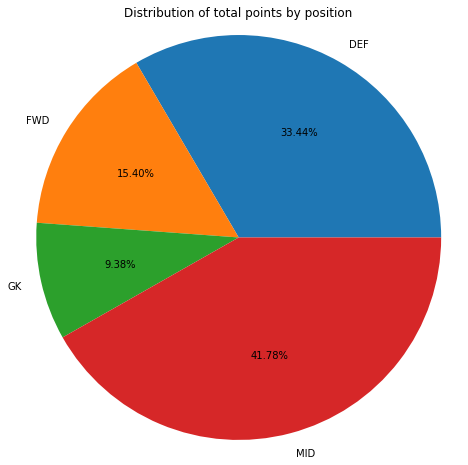

In [41]:
fig1,ax1 = plt.subplots(figsize=(8,8))

ax1.pie(data1[('total_points', 'sum')], labels=data1['position'], autopct='%1.2f%%')
ax1.axis('equal')
plt.title('Distribution of total points by position')
plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\plt1.png')
plt.show()

In [42]:
data1.sort_values(by=('total_points', 'mean'),inplace=True)

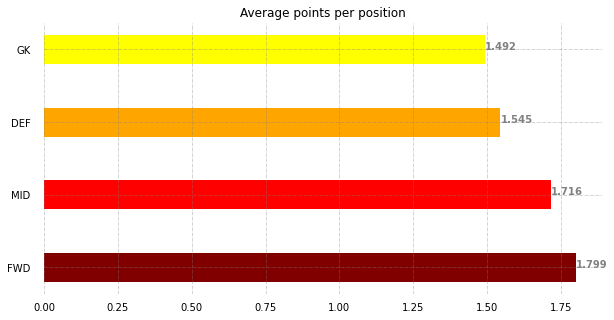

In [43]:
fig, ax = plt.subplots(figsize =(10, 5))
ax.barh(data1['position'],data1[('total_points', 'mean')],height=0.4, color=['yellow','orange','red','maroon'])

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 

ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.7)
 

ax.invert_yaxis()
 

for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.2,
             str(round((i.get_width()), 3)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
plt.title('Average points per position')
plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\plt2.png')
plt.show()


In [44]:
data1.sort_values(by='avg_points_over_price',inplace=True)

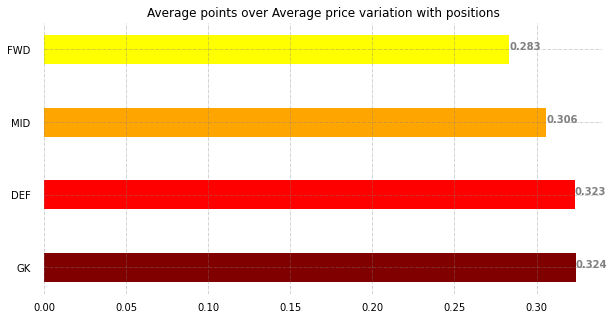

In [45]:
fig, ax = plt.subplots(figsize =(10, 5))
ax.barh(data1['position'],data1['avg_points_over_price'],height=0.4, color=['yellow','orange','red','maroon'])

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 

ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.7)
 

ax.invert_yaxis()
 

for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.2,
             str(round((i.get_width()), 3)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
plt.title('Average points over Average price variation with positions')
plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\plt3.png')
plt.show()

In [50]:
data2.reset_index(inplace=True)

In [53]:
data2.rename(columns={'team_x':'Team Name'},inplace=True)

In [54]:
data2.sort_values(by='sum',inplace=True)
data2

,Team Name,sum,mean
0,Norwich,1772,0.946581
1,Fulham,2009,1.009041
2,West Brom,2332,1.141459
3,Brentford,2464,1.763780
4,Leeds,2859,1.349221
5,Sheffield Utd,2989,1.348827
6,Watford,3267,1.205980
7,Aston Villa,4449,1.334833
8,Wolves,5423,1.620257
9,Brighton,6029,1.497144


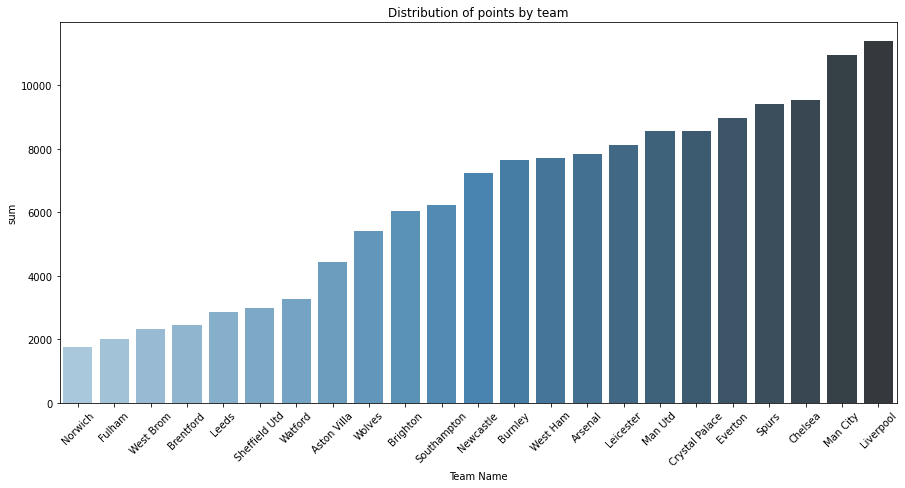

In [55]:
fig, ax = plt.subplots(figsize =(15, 7))
sns.barplot(x='Team Name',y='sum',data=data2,errwidth=0,palette="Blues_d")
plt.xticks(rotation=45)
plt.title('Distribution of points by team')
plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\plt4.png')
plt.show()

In [62]:
data3 = data.groupby(by=['name','position'])['total_points'].agg(['mean','count'])

In [65]:
data3.sort_values(by='mean',inplace=True)

In [64]:
data3=data3.head(20)

In [66]:
data3

,,mean,count
name,position,,
Christian Eriksen,MID,4.000000,166
Mason Mount,MID,4.008850,113
Matheus Pereira,MID,4.026316,38
Alisson Ramses Becker,GK,4.052980,151
Ederson Santana de Moraes,GK,4.073684,190
Andrew Robertson,DEF,4.074890,227
Luis Díaz,MID,4.266667,15
Stuart Dallas,DEF,4.500000,38
Cristiano Ronaldo dos Santos Aveiro,FWD,4.542857,35


In [67]:
data3.reset_index(inplace=True)

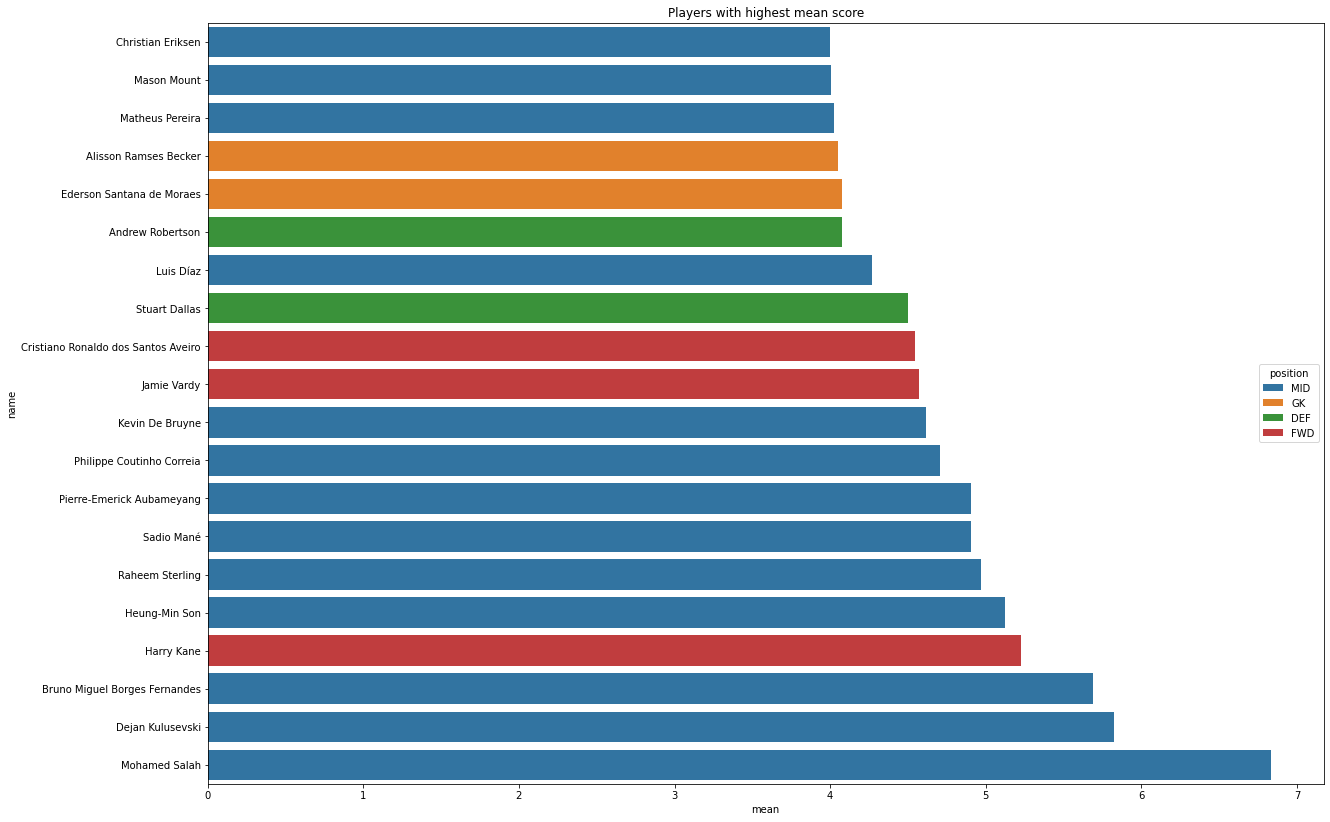

In [72]:
fig, ax = plt.subplots(figsize =(20, 14))
sns.barplot(y='name',x='mean',hue='position',data=data3,errwidth=0,orient='h',dodge=False)

plt.title('Players with highest mean score')
plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\plt5.png')
plt.show()